In [38]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
%matplotlib inline
import os

#pd options
pd.set_option("max_columns",None)
pd.set_option("max_rows",None)
print(os.getcwd())

c:\Users\alann\Documents\GitHub\Python-SVM


In [2]:
df = pd.read_csv("./Data/diabetic_data.csv")
print(df.shape)
df.head()

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
#check the number of unique values in each columns
df.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
#check for class balance.
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

The prediction class given is not balanced. For this exercise we will not balance the class and will use SVM with linear kernel with class weight = balanced.

In [7]:
#look at the value breakdown
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [8]:
#from the result, remove all 2273 since it is considered missing values
df = df[df['race'] != '?']

In [9]:
#check gender data
df['gender'].value_counts()

Female             53575
Male               45917
Unknown/Invalid        1
Name: gender, dtype: int64

In [10]:
#remove the unknown data
df = df[df['gender'] != 'Unknown/Invalid']

<AxesSubplot:xlabel='gender', ylabel='count'>

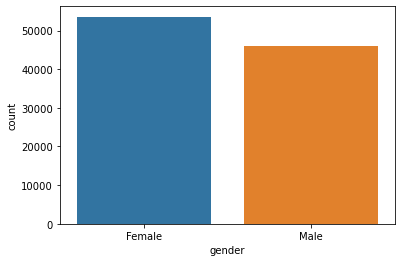

In [11]:
#plot the count of the gender
#sns.barplot(x=df['gender'],y=df.groupby(by=['gender']).count()['encounter_id'])
sns.countplot(x='gender',data = df)

<AxesSubplot:xlabel='age', ylabel='count'>

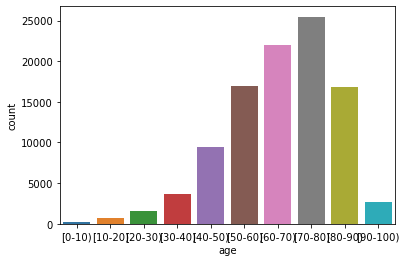

In [12]:
#the rather interesting point here for age is that it is an object type, let's see the breakdown of the age
#df['age'].value_counts()
sns.countplot(x='age',data = df)

the age here is already grouped into different bins. Hence no further processing is needed.

In [13]:
#majority of the weight information is missing
print(df['weight'].value_counts())
print(df['payer_code'].value_counts())


?            96433
[75-100)      1279
[50-75)        861
[100-125)      596
[125-150)      136
[25-50)         93
[0-25)          47
[150-175)       34
[175-200)       10
>200             3
Name: weight, dtype: int64
?     39711
MC    31605
HM     6128
SP     4763
BC     4541
MD     3434
CP     2463
UN     2284
CM     1919
OG     1025
PO      589
DM      534
CH      144
WC      125
OT       95
MP       77
SI       55
Name: payer_code, dtype: int64


Majority of the weight information is missing. In addition, payer_code may not be as relevant, as it tells what form of payment by the patient. Hence we will remove both of this feature from the dataset.

In [14]:
#drop the weight column
df = df.drop(columns=['weight','payer_code'], axis = 1)

In [15]:
print(df.shape)
df.head()

(99492, 48)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [16]:
discharge_code = pd.read_excel("./Data/id_mapping.xlsx", sheet_name= "discharge")
admission_type = pd.read_excel("./Data/id_mapping.xlsx", sheet_name= "admission_type")
admission_source = pd.read_excel("./Data/id_mapping.xlsx", sheet_name= "admission_source")

#ensure the mapping code is unqiue count
print(discharge_code['description'].value_counts())
print(admission_source['description'].value_counts())
print(admission_type['description'].value_counts())

Discharged/transferred to a federal health care facility.                                                    1
Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere                      1
Still patient or expected to return for outpatient services                                                  1
Discharged/transferred to another short term hospital                                                        1
Discharged/transferred to home under care of Home IV provider                                                1
Unknown/Invalid                                                                                              1
Not Mapped                                                                                                   1
Discharged/transferred within this institution to Medicare approved swing bed                                1
Expired                                                                                                      1
E

In [17]:
df_desc = pd.merge(df, discharge_code, how='left', left_on=['discharge_disposition_id'],right_on=['discharge_disposition_id'])
df_desc = df_desc.rename(columns={'description':'discharge_desc'})
print(df_desc.shape)
df_desc = pd.merge(df_desc,admission_type, how='left', left_on=['admission_type_id'],right_on=['admission_type_id'])
df_desc = df_desc.rename(columns={'description':'admission_type_desc'})
print(df_desc.shape)
df_desc = pd.merge(df_desc,admission_source, how='left', left_on=['admission_source_id'],right_on=['admission_source_id'])
df_desc = df_desc.rename(columns={'description':'admission_source_desc'})
print(df_desc.shape)
admission_type = pd.read_excel("./Data/id_mapping.xlsx", sheet_name= "admission_type")
df_desc.head()

(99492, 50)
(99492, 52)
(99492, 54)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,discharge_desc,discharge_groupings,admission_type_desc,description_org,admission_source_desc,admission_groupings
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Not Mapped,Others,Others,NaN,Physician Referral,Referral
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Discharged to home,Discharged to home,Emergency,Emergency,Emergency Room,Emergency Room
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Discharged to home,Discharged to home,Emergency,Emergency,Emergency Room,Emergency Room
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Discharged to home,Discharged to home,Emergency,Emergency,Emergency Room,Emergency Room
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Discharged to home,Discharged to home,Emergency,Emergency,Emergency Room,Emergency Room


In [18]:
#pd.crosstab(df["discharge_disposition_id"],df["readmitted"])
df_desc['discharge_desc'].value_counts()

Discharged to home                                                                                           58767
Discharged/transferred to SNF                                                                                13614
Discharged/transferred to home with home health service                                                      12698
Discharged/transferred to another short term hospital                                                         2061
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1981
Expired                                                                                                       1608
Discharged/transferred to another type of inpatient care institution                                          1143
Not Mapped                                                                                                     973
Discharged/transferred to ICF                                                   

In [19]:
discharge_code = pd.read_excel("./Data/id_mapping.xlsx", sheet_name= "discharge")
admission_type = pd.read_excel("./Data/id_mapping.xlsx", sheet_name= "admission_type")
admission_source = pd.read_excel("./Data/id_mapping.xlsx", sheet_name= "admission_source")

discharge_code.drop(columns = ['description'], inplace = True)
admission_source.drop(columns = ['description'], inplace = True)

In [20]:
df_desc = pd.merge(df, discharge_code, how='left', left_on=['discharge_disposition_id'],right_on=['discharge_disposition_id'])
print(df_desc.shape)
df_desc = pd.merge(df_desc,admission_type, how='left', left_on=['admission_type_id'],right_on=['admission_type_id'])
df_desc = df_desc.rename(columns={'description':'admission_type_desc'})
print(df_desc.shape)
df_desc = pd.merge(df_desc,admission_source, how='left', left_on=['admission_source_id'],right_on=['admission_source_id'])
print(df_desc.shape)

(99492, 49)
(99492, 51)
(99492, 52)


In [21]:
df_desc.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,discharge_groupings,admission_type_desc,description_org,admission_groupings
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Others,Others,NaN,Referral
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Discharged to home,Emergency,Emergency,Emergency Room
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Discharged to home,Emergency,Emergency,Emergency Room
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Discharged to home,Emergency,Emergency,Emergency Room
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Discharged to home,Emergency,Emergency,Emergency Room


In [22]:
#checking the breakdown of NaN groupings to ensure it is alright
df_desc[df_desc['admission_groupings'].isnull()]['admission_source_id'].value_counts()

Series([], Name: admission_source_id, dtype: int64)

In [23]:
df_desc['medical_specialty'].value_counts()

?                                       48766
InternalMedicine                        14197
Emergency/Trauma                         7540
Family/GeneralPractice                   7271
Cardiology                               5246
Surgery-General                          3043
Nephrology                               1593
Orthopedics                              1377
Orthopedics-Reconstructive               1190
Radiologist                              1117
Pulmonology                               840
Psychiatry                                829
Urology                                   670
ObstetricsandGynecology                   649
Surgery-Cardiovascular/Thoracic           629
Gastroenterology                          560
Surgery-Vascular                          533
Surgery-Neuro                             455
PhysicalMedicineandRehabilitation         382
Oncology                                  347
Pediatrics                                249
Hematology/Oncology               

In [24]:
df_desc['A1Cresult'].value_counts()

None    82896
>8       7961
Norm     4905
>7       3730
Name: A1Cresult, dtype: int64

In [25]:
print(df_desc.columns.values)

['encounter_id' 'patient_nbr' 'race' 'gender' 'age' 'admission_type_id'
 'discharge_disposition_id' 'admission_source_id' 'time_in_hospital'
 'medical_specialty' 'num_lab_procedures' 'num_procedures'
 'num_medications' 'number_outpatient' 'number_emergency'
 'number_inpatient' 'diag_1' 'diag_2' 'diag_3' 'number_diagnoses'
 'max_glu_serum' 'A1Cresult' 'metformin' 'repaglinide' 'nateglinide'
 'chlorpropamide' 'glimepiride' 'acetohexamide' 'glipizide' 'glyburide'
 'tolbutamide' 'pioglitazone' 'rosiglitazone' 'acarbose' 'miglitol'
 'troglitazone' 'tolazamide' 'examide' 'citoglipton' 'insulin'
 'glyburide-metformin' 'glipizide-metformin' 'glimepiride-pioglitazone'
 'metformin-rosiglitazone' 'metformin-pioglitazone' 'change' 'diabetesMed'
 'readmitted' 'discharge_groupings' 'admission_type_desc'
 'description_org' 'admission_groupings']


In [26]:
#spilt between qualitiative and categorical columns
df_desc = df_desc.reset_index(drop = True)

df_quan = df_desc[['time_in_hospital','num_lab_procedures','num_procedures','num_medications',
              'number_outpatient','number_emergency','number_inpatient',
              'number_diagnoses']]

df_cat = df_desc[['race', 'gender', 'age', 'admission_groupings','discharge_groupings','admission_type_desc','medical_specialty','max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide','chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide','tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol','troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin','glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone','metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed','readmitted']]
 
print(df_quan.shape)
print(df_cat.shape)

(99492, 8)
(99492, 35)


In [27]:
#need to recode all cat into int
new_df_cat = pd.DataFrame()
column_list = list(df_cat.columns.values)
le = preprocessing.LabelEncoder()

for i in column_list:
    print(i)
    new_df_cat[i] = le.fit_transform(df_cat[i])

race
gender
age
admission_groupings
discharge_groupings
admission_type_desc
medical_specialty
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted


In [28]:
enc = OneHotEncoder()
onehot = enc.fit_transform(new_df_cat.drop('readmitted',axis = 1)).toarray()
onehot_df = pd.DataFrame(onehot)
print(new_df_cat.shape)
print(onehot_df.shape)

(99492, 35)
(99492, 191)


In [29]:
#change the scale of the quan variables
scaler = MinMaxScaler()
scaler.fit(df_quan)
X_quan = scaler.transform(df_quan)
X_quan = pd.DataFrame(X_quan)
col_names = {i:j for i,j in zip(X_quan.columns.values,df_quan.columns.values)}
X_quan.rename(columns = col_names, inplace = True)
X_quan.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,0.000000,0.305344,0.000000,0.0000,0.000000,0.0,0.000000,0.000000
1,0.153846,0.442748,0.000000,0.2125,0.000000,0.0,0.000000,0.533333
2,0.076923,0.076336,0.833333,0.1500,0.047619,0.0,0.047619,0.333333
3,0.076923,0.328244,0.166667,0.1875,0.000000,0.0,0.000000,0.400000
4,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.000000,0.266667


In [30]:
processed_df = pd.concat([onehot_df,X_quan],axis = 1)
print(processed_df.shape)

(99492, 199)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(processed_df, np.array(new_df_cat['readmitted']), test_size=0.2, random_state=1234, stratify = np.array(new_df_cat['readmitted']))

In [32]:
tuned_params = [{'alpha': np.logspace(-10,-1,10), 'l1_ratio': np.arange(0,1,0.1)}]
clf = GridSearchCV(SGDClassifier(loss = 'hinge', penalty = 'elasticnet', class_weight='balanced'),tuned_params, cv=5, n_jobs = 7)
clf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=SGDClassifier(class_weight='balanced',
                                     penalty='elasticnet'),
             n_jobs=7,
             param_grid=[{'alpha': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01]),
                          'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}])

In [33]:
clf.best_params_

{'alpha': 0.01, 'l1_ratio': 0.9}

In [35]:
y_pred = clf.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.57      0.21      2234
           1       0.39      0.07      0.12      7002
           2       0.58      0.48      0.52     10663

    accuracy                           0.34     19899
   macro avg       0.37      0.37      0.29     19899
weighted avg       0.46      0.34      0.35     19899



param_range = np.logspace(-10,-1,100)
train_scores, test_scores = validation_curve(
    SGDClassifier(tol=1e-3, class_weight = 'balanced'), X_train, y_train, param_name="alpha", param_range=param_range,
    cv=3, scoring="accuracy", n_jobs=7)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SGDClassifier")
plt.xlabel("max_iter")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()